### Support Vector Regression (SVR) / Метод Опорных Векторов для Регрессии

С помощью метода опорных векторов можно решать и задачи регрессии. В этом случае имеем дело с SVR (Support Vector Regression), когда выходные значения представляют собой вещественные числа, а не метки классов. SVR, как и SVM для классификации, стремится найти оптимальную гиперплоскость, но вместо разделения классов, он ищет гиперплоскость, которая наилучшим образом аппроксимирует данные, допуская при этом определенную погрешность $\epsilon$.

#### Пример задачи

Давайте представим, что нам необходимо аппроксимировать функцию:

$$f(x) = \sin(x/2) + 0.2 \cdot \cos(2x) - 0.1 \cdot \sin(4x) - 2.5$$

линейной моделью вида:

$$a(x) = w_0 + w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot x^3 + w_4 \cdot \cos(x) + w_5 \cdot \sin(x)$$

То есть, вектор признаков $x_i$ будет состоять из следующих компонент:

$$x_i = [1, x, x^2, x^3, \cos(x), \sin(x)]^T$$

Алгоритм SVR выполняет поиск вектора параметров $w^T = [w_0, w_1, w_2, w_3, w_4, w_5]^T$ по тому же базовому принципу, что и SVM (который используется для задачи классификации), но с ключевым отличием в функции потерь.

#### Функция потерь в SVR ($\epsilon$-нечувствительная функция потерь)

В отличие от классификации, где ошибки классификации учитываются, в регрессии мы хотим, чтобы предсказания были как можно ближе к истинным значениям. SVR вводит понятие $\epsilon$-трубы (epsilon-tube), внутри которой ошибки не наказываются. Это означает, что если разница между предсказанным значением $a(x_i)$ и истинным $y_i$ меньше $\epsilon$, то считается, что модель справилась идеально. Только ошибки, превышающие $\epsilon$, включаются в расчет потерь.

Функция потерь в SVR записывается в виде:

$$L_i(w) = |a(x_i) - y_i|_\epsilon = \max(0, |a(x_i) - y_i| - \epsilon)$$

где $\epsilon > 0$ — величина отклонения от требуемых значений, которая не учитывается как ошибка.

#### Оптимизационная задача SVR

Основная идея SVR заключается в минимизации коэффициентов модели $w$ (что эквивалентно максимизации "ширины" допустимой погрешности) и минимизации ошибок, которые выходят за пределы $\epsilon$-трубы. Это также формулируется как задача квадратичного программирования:

$$
\left\{
\begin{aligned}
&\min_{w,b,\{\xi_i,\xi_i^*\}} \quad && \frac{1}{2}\lVert w\rVert^2 + C\sum_{i=1}^n (\xi_i + \xi_i^*) \\[8pt]
&\text{при условии:} \quad && a(x_i) = w^\top x_i + b, \\[6pt]
& && y_i - a(x_i) \le \varepsilon + \xi_i, \quad i=1,\dots,n, \\[4pt]
& && a(x_i) - y_i \le \varepsilon + \xi_i^*, \quad i=1,\dots,n, \\[4pt]
& && \xi_i \ge 0,\; \xi_i^* \ge 0, \quad i=1,\dots,n.
\end{aligned}
\right.
$$


Здесь $\xi_i$ и $\xi_i^*$ — переменные ослабления для верхних и нижних границ $\epsilon$-трубы соответственно, а $C$ — параметр регуляризации, контролирующий баланс между минимизацией сложности модели и величиной допустимых ошибок.

#### Ядерный трюк (Kernel Trick)

Как и в SVM для классификации, SVR может использовать ядерный трюк для решения нелинейных задач регрессии, отображая данные в более высокоразмерное признаковое пространство. Это позволяет аппроксимировать сложные нелинейные зависимости с помощью линейной модели в преобразованном пространстве.

#### Оценка качества SVR

Для оценки качества регрессионной модели SVR обычно используются метрики, такие как:
-   **Среднеквадратичная ошибка (Mean Squared Error - MSE)**
-   **Средняя абсолютная ошибка (Mean Absolute Error - MAE)**
-   **R-квадрат ($R^2$)**

SVR является мощным инструментом для решения широкого круга регрессионных задач, особенно когда данные имеют сложную нелинейную структуру или когда важно контролировать допустимую погрешность предсказаний.

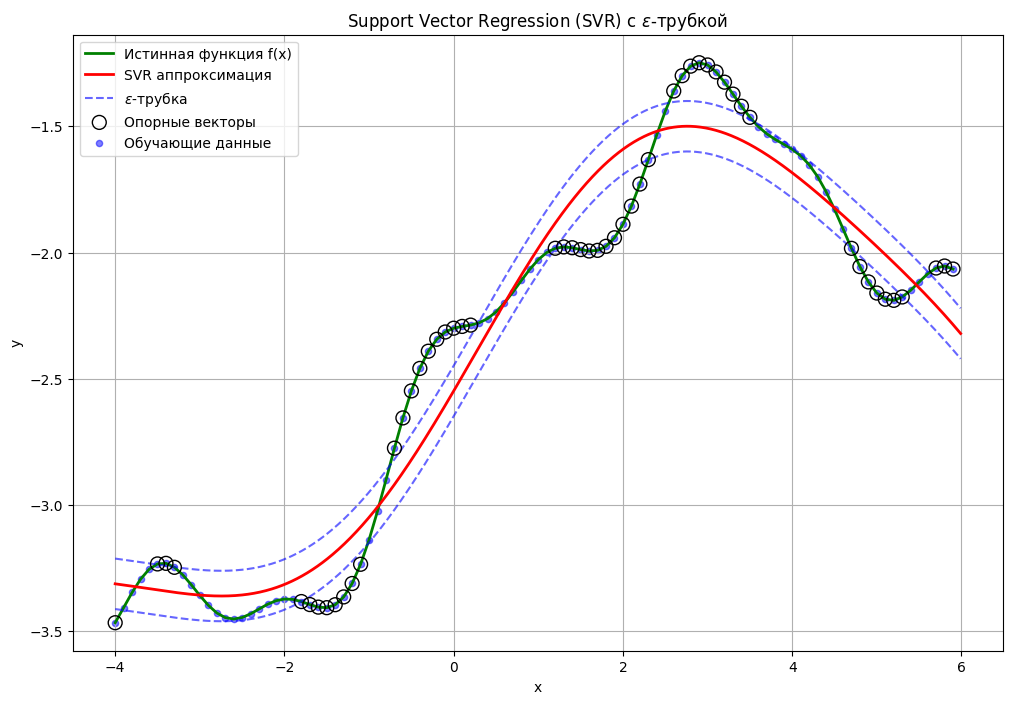

In [1]:
import numpy as np
from sklearn import svm

def func(x):
    return np.sin(0.5*x) + 0.2 * np.cos(2*x) - 0.1 * np.sin(4 * x) - 2.5

def model(w, x):
    # для красоты оставим эту версию для одномерных x
    return w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 + w[4] * np.cos(x) + w[5] * np.sin(x)

# обучающая выборка
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

x_train = np.array([[x, x**2, x**3, np.cos(x), np.sin(x)] for x in coord_x])
y_train = coord_y

# обучение линейного SVR
svr = svm.SVR(kernel='linear')
svr.fit(x_train, y_train)

# коэффициенты
w1 = svr.coef_[0]
w0 = svr.intercept_[0]
w = np.hstack([w0, w1])

# предсказания и среднеквадратичная ошибка
y_pred = x_train @ w[1:] + w[0]
Q = np.mean((y_pred - y_train)**2)
import matplotlib.pyplot as plt

# Генерация данных для построения плавной кривой
x_plot = np.arange(-4.0, 6.0, 0.01)

# Преобразование данных для предсказания SVR
x_plot_features = np.array([[x, x**2, x**3, np.cos(x), np.sin(x)] for x in x_plot])

# Предсказания SVR модели
y_svr_pred = svr.predict(x_plot_features)

# Значение epsilon из модели SVR
epsilon = svr.epsilon

plt.figure(figsize=(12, 8))

# Исходная функция
plt.plot(coord_x, func(coord_x), 'g-', label='Истинная функция f(x)', linewidth=2)

# Предсказанная функция SVR
plt.plot(x_plot, y_svr_pred, 'r-', label='SVR аппроксимация', linewidth=2)

# Эпсилон-трубка
plt.plot(x_plot, y_svr_pred + epsilon, 'b--', label='$\epsilon$-трубка', alpha=0.6)
plt.plot(x_plot, y_svr_pred - epsilon, 'b--', alpha=0.6)

# Опорные векторы
# SVR хранит опорные векторы в svr.support_vectors_
# Нужно найти соответствующие оригинальные x значения и y значения
# x_train (для SVR) имеет 5 признаков, без bias. support_vectors_ тоже 5 признаков.
# Нужно отобразить их на исходный coord_x

# Находим индексы опорных векторов в исходном x_train
support_vector_indices = svr.support_

# Получаем исходные X-координаты опорных векторов
x_support = coord_x[support_vector_indices]
# Получаем исходные Y-координаты опорных векторов
y_support = func(x_support)

plt.scatter(x_support, y_support, facecolors='none', edgecolors='k', s=100, label='Опорные векторы', zorder=2)

# Обучающие данные
plt.scatter(coord_x, coord_y, c='blue', s=20, alpha=0.5, label='Обучающие данные')

plt.title('Support Vector Regression (SVR) с $\epsilon$-трубкой')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()